# STAT479 Midterm

## Juan J Lopez

## Bank Customer Churn Dataset
In business, the term churn is defined as the percentage of customers who cease to utilize a company's services or products during a period of time.
The Purpose of this dataset is to understand the factors that lead an increase in customer churn and properly classify them with a the help of a Feedforward Neural Network.

## Dataset Information:
This Dataset was found in kaggle.com originally containing 12 variables and 10,000 variables:
<ul>
    <li>Target variable: churn: Customer who stopped using the bank's products or services. 1=churn, 0=no churn.</li>
    <li>Categorical variables: <ul><li>country: Customer's country branch: Germany, France or Spain.</li><li>gender: Client's gender, male or female.</li><li>credit_card: Whether the client has a credit card with the bank. Binary where 1=yes, 0=no.</li><li>active_member: Client actively uses the account: Binary yes=1, no=0.</li></ul></li>
    <li>Continuous variables: <ul><li>credit_score: Client's credit score.</li><li>age: Client age.</li><li>tenure: Number of years as a bank client.</li><li>balance: Current account balance in euros.</li><li>products_number: Client's number of bank products.</li><li>estimated_salary: Average monthly salary in euros.</li></ul></li><il><il>Misc: </il><ul><il>ID: Not used, will be deleted during data processing.</il></ul></ul>
</ul>

In [56]:
#Importing packages for data processing and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:/Users/Jo/Documents/Notebooks/Bank Customer Churn Prediction.csv')
#'C:/Users/Hal-2000/Documents/479/Bank Customer Churn Prediction.csv' laptop
#'C:/Users/Jo/Documents/Notebooks/Bank Customer Churn Prediction.csv' PC
print(df.head())

   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  


## Data processing:
<ul><il>Encode categorical variables. OneHotEnconde country variable, encode gender.</il></ul>
<ul><il>Check for douplicates.</il></ul>
<ul><il>Drop ID.</il></ul>
<ul><il>Standardize continuous variables.</il></ul>


In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
#Since country variable is categorical with more than two values, OneHotEncoding is appplied
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
encoder=OneHotEncoder()
encoded_country=encoder.fit_transform(df[['country']])
encode_df=pd.DataFrame(encoded_country.toarray(), columns=encoder.get_feature_names_out(['country']))
df=pd.concat([df,encode_df],axis=1)
#Change gender category to binary: Female=1, Male=0.
df['gender']=df['gender'].map({'Female':1, 'Male':0})
#Drop 'customer_id' and 'country' variables:
df=df.drop(['customer_id','country'],axis=1)
print(df.head())

   credit_score  gender  age  tenure    balance  products_number  credit_card  \
0           619       1   42       2       0.00                1            1   
1           608       1   41       1   83807.86                1            0   
2           502       1   42       8  159660.80                3            1   
3           699       1   39       1       0.00                2            0   
4           850       1   43       2  125510.82                1            1   

   active_member  estimated_salary  churn  country_France  country_Germany  \
0              1         101348.88      1             1.0              0.0   
1              1         112542.58      0             0.0              0.0   
2              0         113931.57      1             1.0              0.0   
3              0          93826.63      0             1.0              0.0   
4              1          79084.10      0             0.0              0.0   

   country_Spain  
0            0.0  
1     

In [4]:
#Check for Duplicate values
print(df[df.duplicated()])

Empty DataFrame
Columns: [credit_score, gender, age, tenure, balance, products_number, credit_card, active_member, estimated_salary, churn, country_France, country_Germany, country_Spain]
Index: []


There are no duplicate variables in the dataset.

## Data Visualization:
<ul><il>Check propotion of the target variable.</il></ul>
<ul><il>Look at correlation matrix to see the variables relate to the target variable.</il></ul>
<ul><il>Check distribution of continuous variables. Pre and post-Standardization.</il></ul>


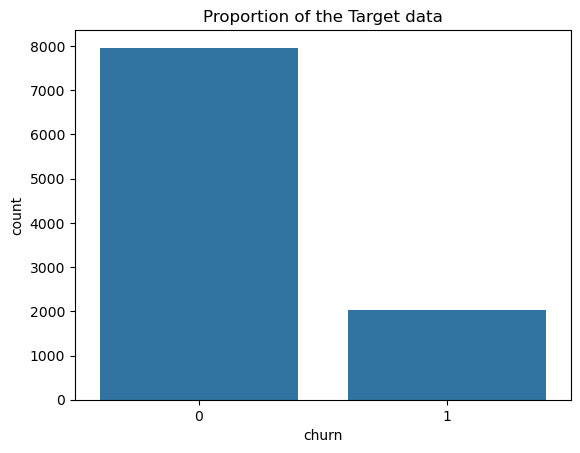

churn
0    7963
1    2037
Name: count, dtype: int64


In [5]:
sns.countplot(df, x='churn')
plt.title('Proportion of the Target data')
plt.show()
print(df['churn'].value_counts())

Positive churn ratio is underrepresented, consisting of ~26% of the total data and therefore imbalanced.

### Correlation Matrix:

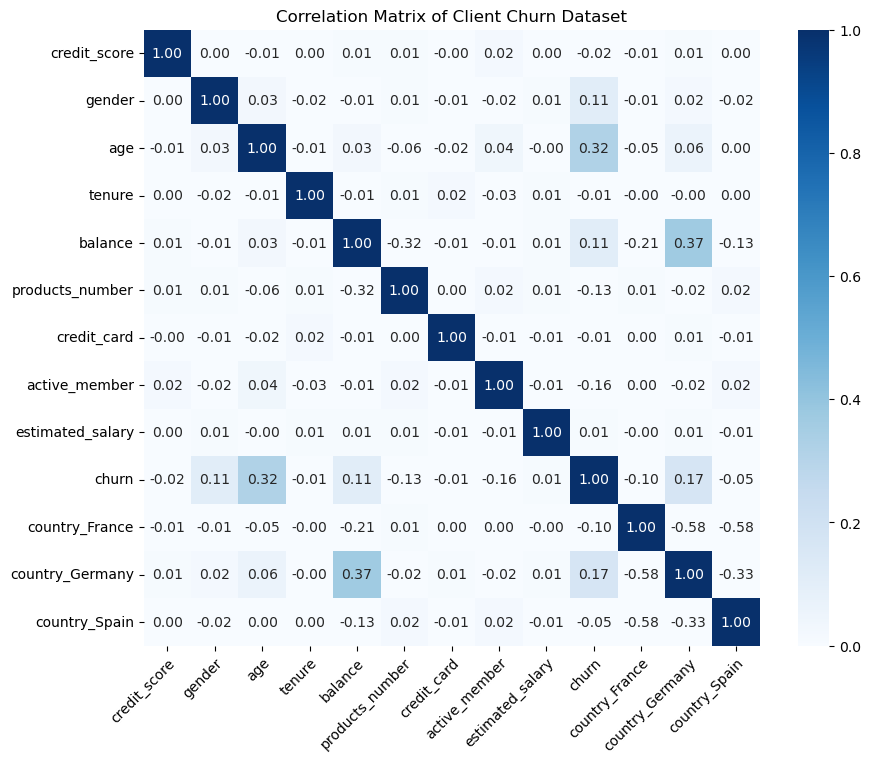

In [6]:
corr_m=df.corr(method='spearman').round(2)
plt.figure(figsize=(10,8))
sns.heatmap(corr_m,cmap='Blues', vmin=0, vmax=1, annot=True, fmt='0.2f', square=True)
plt.title('Correlation Matrix of Client Churn Dataset')
plt.xticks(rotation=45, rotation_mode='anchor', ha='right')
plt.show()

<p>Age has the highest correlation to churn with 0.32, the biggest negative correlation to churn is active_member with -0.16.
<br>So, the older a client is, the more likely it is that the client has stopped using bank services or products at some point. Having an active account reduces the chance that a client leaves the institution.</p>

### Histogram of continuous variables pre-standardization:

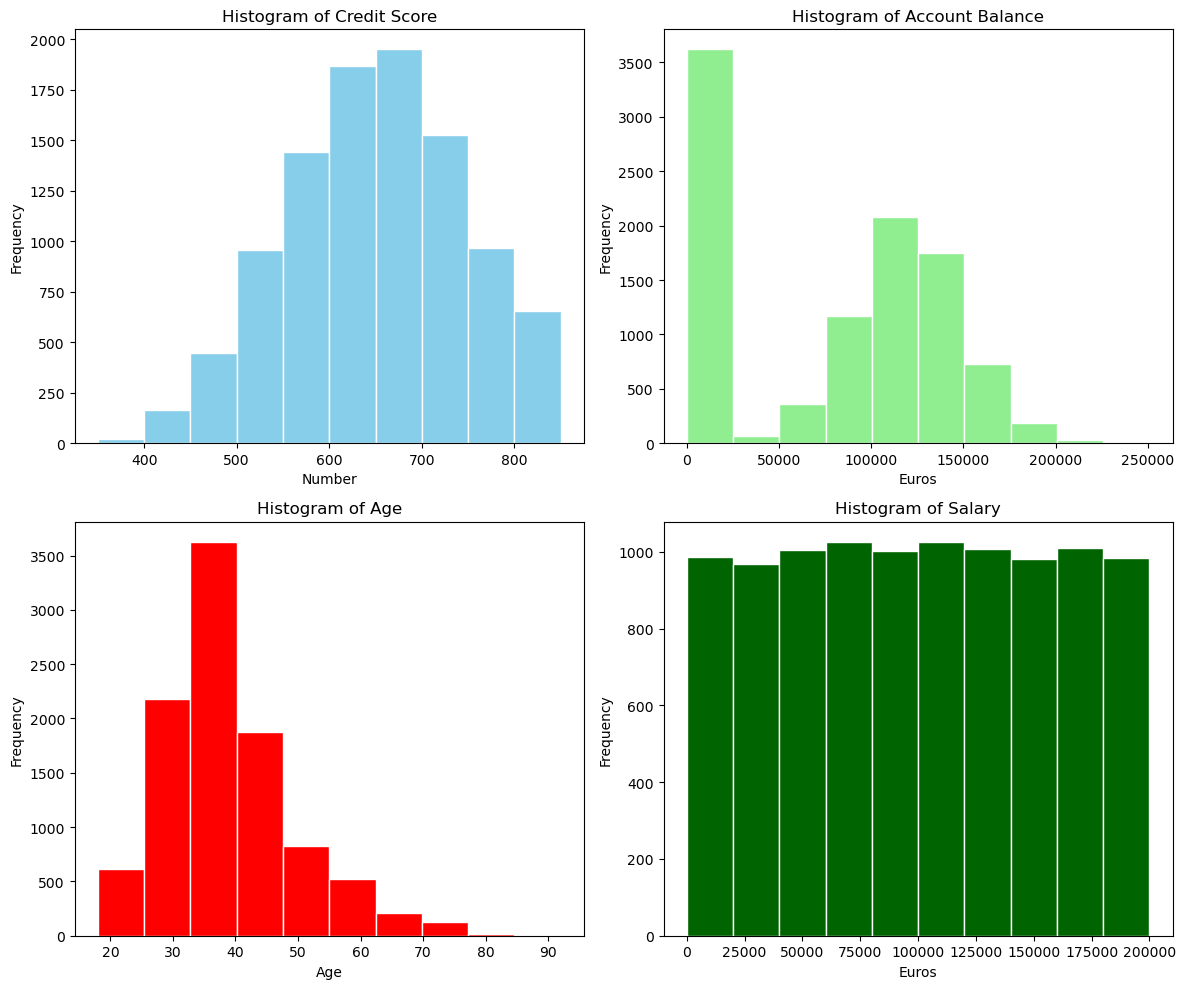

In [7]:
fig,graphs=plt.subplots(nrows=2, ncols=2, figsize=(12,10))
graphs[0,0].hist(df[['credit_score']], color='skyblue', ec='white')
graphs[0,0].set_title('Histogram of Credit Score')
graphs[0,0].set_xlabel('Number')
graphs[0,0].set_ylabel('Frequency')

graphs[0,1].hist(df[['balance']], color='lightgreen', ec='white')
graphs[0,1].set_title('Histogram of Account Balance')
graphs[0,1].set_xlabel('Euros')
graphs[0,1].set_ylabel('Frequency')

graphs[1,0].hist(df[['age']], color='red', ec='white')
graphs[1,0].set_title('Histogram of Age')
graphs[1,0].set_xlabel('Age')
graphs[1,0].set_ylabel('Frequency')

graphs[1,1].hist(df[['estimated_salary']], color='darkgreen', ec='white')
graphs[1,1].set_title('Histogram of Salary')
graphs[1,1].set_xlabel('Euros')
graphs[1,1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
#Proceeed to Standardized continuous variables
scaler=StandardScaler()
df[['credit_score','balance','age','tenure','products_number','estimated_salary']]=scaler.fit_transform(df[['credit_score','balance','age','tenure','products_number','estimated_salary']])
print(df.head())

   credit_score  gender       age    tenure   balance  products_number  \
0     -0.326221       1  0.293517 -1.041760 -1.225848        -0.911583   
1     -0.440036       1  0.198164 -1.387538  0.117350        -0.911583   
2     -1.536794       1  0.293517  1.032908  1.333053         2.527057   
3      0.501521       1  0.007457 -1.387538 -1.225848         0.807737   
4      2.063884       1  0.388871 -1.041760  0.785728        -0.911583   

   credit_card  active_member  estimated_salary  churn  country_France  \
0            1              1          0.021886      1             1.0   
1            0              1          0.216534      0             0.0   
2            1              0          0.240687      1             1.0   
3            0              0         -0.108918      0             1.0   
4            1              1         -0.365276      0             0.0   

   country_Germany  country_Spain  
0              0.0            0.0  
1              0.0            1.0  
2 

### Histogram of continuous variables post-standardization:

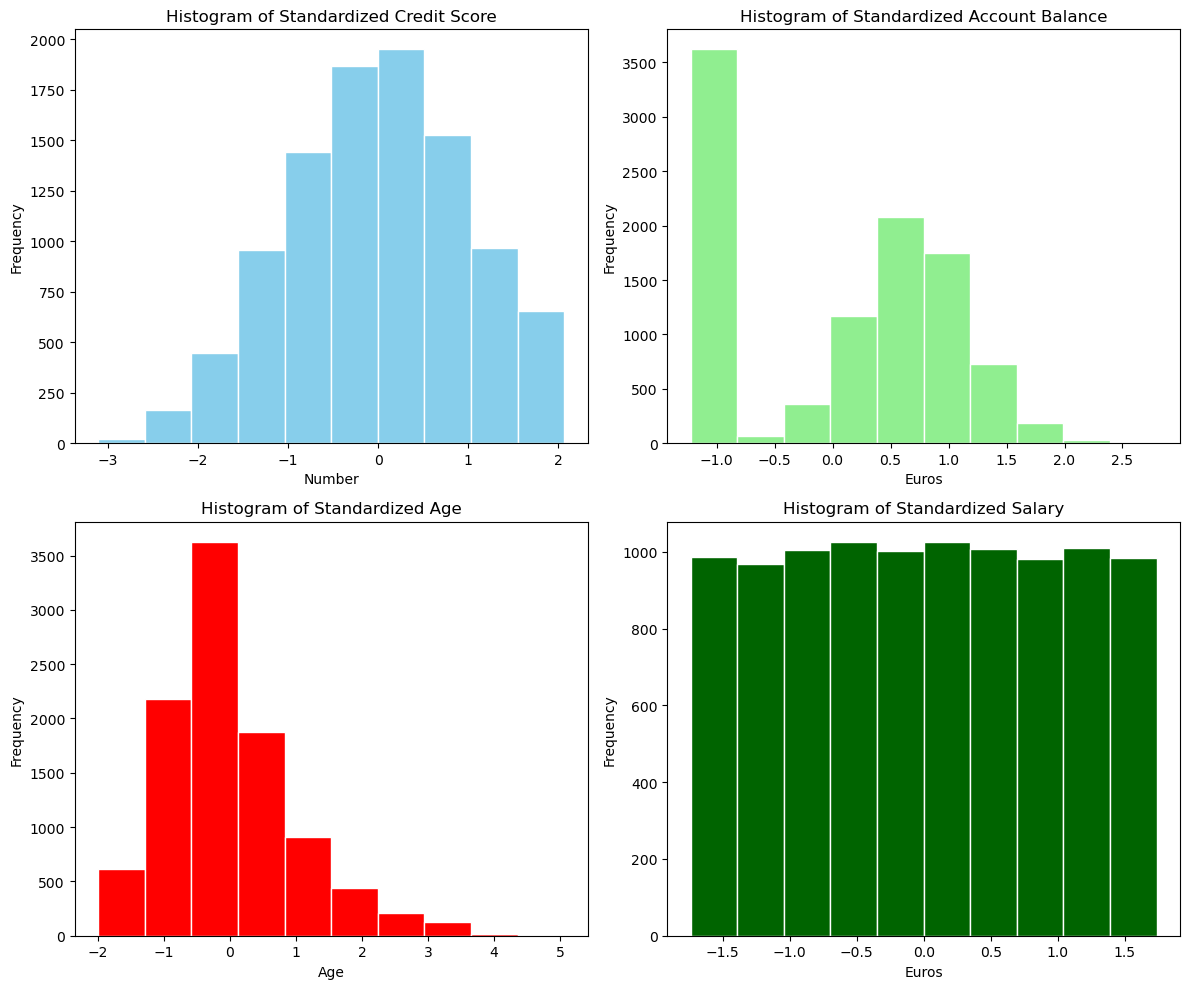

In [12]:
#Graph of Standardized values
fig,graphs=plt.subplots(nrows=2, ncols=2, figsize=(12,10))
graphs[0,0].hist(df[['credit_score']], color='skyblue', ec='white')
graphs[0,0].set_title('Histogram of Standardized Credit Score')
graphs[0,0].set_xlabel('Number')
graphs[0,0].set_ylabel('Frequency')

graphs[0,1].hist(df[['balance']], color='lightgreen', ec='white')
graphs[0,1].set_title('Histogram of Standardized Account Balance')
graphs[0,1].set_xlabel('Euros')
graphs[0,1].set_ylabel('Frequency')

graphs[1,0].hist(df[['age']], color='red', ec='white')
graphs[1,0].set_title('Histogram of Standardized Age')
graphs[1,0].set_xlabel('Age')
graphs[1,0].set_ylabel('Frequency')

graphs[1,1].hist(df[['estimated_salary']], color='darkgreen', ec='white')
graphs[1,1].set_title('Histogram of Standardized Salary')
graphs[1,1].set_xlabel('Euros')
graphs[1,1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

In [7]:
#Separate the variables from target
x=df.drop('churn', axis=1)
y=pd.DataFrame(df['churn'])
print(x.shape)
d,n=x.shape

(10000, 12)


## Data split:
<p>The dataset was originally split into a 70% for testing and 30%, with an additional 50% split for testing and validation. This was later changed to a 80%-10%-10% split after it showed an increase to the overall accuracy by an average of 0.02.<br> To account for imbalance, the split was performed with stratify. Two undersampling techniques were used: RandomUnderSampler and NearMiss. NearMiss significantly underperformed in model 1 evaluation and was omitted from the report. </p>

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_temp, y_train, y_temp=train_test_split(x,y, test_size=.2, stratify=y, random_state=999)
x_test, x_val, y_test, y_val = train_test_split(x_temp,y_temp, test_size=.5, stratify=y_temp, random_state=450)

print('The training split shape is:',x_train.shape,'\nThe testing split shape is:', x_test.shape,'\nThe validation split shape is:', x_val.shape)
print('\nThe target training split shape is:',y_train.shape,'\nThe target testing split shape is:', y_test.shape,'\nThe target validation split shape is:', y_val.shape)

The training split shape is: (8000, 12) 
The testing split shape is: (1000, 12) 
The validation split shape is: (1000, 12)

The target training split shape is: (8000, 1) 
The target testing split shape is: (1000, 1) 
The target validation split shape is: (1000, 1)


churn
0    6370
1    1630
Name: count, dtype: int64


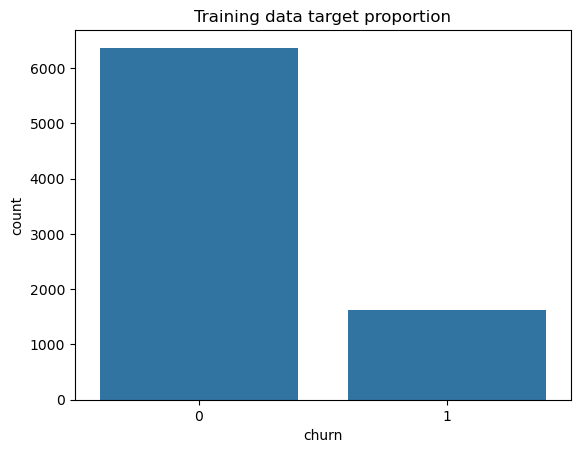

In [214]:
sns.countplot(y_train, x='churn')
print(y_train['churn'].value_counts())
plt.title('Training data target proportion')
plt.show()

Propotion of ~26% remains the same post split.

### Undersampling data
RandomUnderSampler is used to balance the dataset and compare its evaluation to the stratified split.

In [317]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=123)
x_under,y_under=rus.fit_resample(x_train, y_train)

churn
0    6370
1    1630
Name: count, dtype: int64


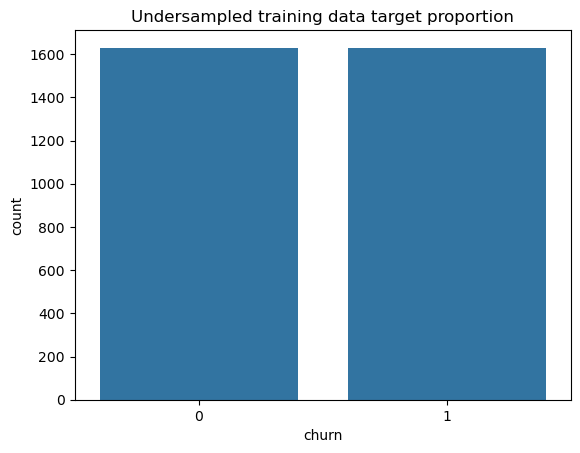

In [319]:
sns.countplot(y_under, x='churn')
print(y_train['churn'].value_counts())
plt.title('Undersampled training data target proportion')
plt.show()

50-50 proportion

## FNN Model Building:

In [221]:
from keras.layers import Dense , Input, Dropout, BatchNormalization, LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam

<p>Build a simple model with 1 hidden layer, 32 neurons, activation relu, batch_size 32, epochs 60 and adam optimizer with default learning rate of 0.001 and sigmoid activation for classification.<br>This simple model will set a default accuracy to be improved upon on future models.</p>

In [321]:
model_1=Sequential()
model_1.add(Input(shape=(n,)))
model_1.add(Dense(32,activation='relu')),
model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [217]:
hist_1=model_1.fit(x_train, y_train, validation_data=(x_val, y_val),batch_size=32, epochs=60)

Epoch 1/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step - accuracy: 0.7377 - loss: 0.5501 - val_accuracy: 0.8130 - val_loss: 0.4211
Epoch 2/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.7972 - loss: 0.4408 - val_accuracy: 0.8240 - val_loss: 0.3932
Epoch 3/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.8096 - loss: 0.4228 - val_accuracy: 0.8440 - val_loss: 0.3765
Epoch 4/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.8319 - loss: 0.3918 - val_accuracy: 0.8550 - val_loss: 0.3632
Epoch 5/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.8547 - loss: 0.3640 - val_accuracy: 0.8580 - val_loss: 0.3551
Epoch 6/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.8495 - loss: 0.3640 - val_accuracy: 0.8540 - val_loss: 0.3521
Epoch 7/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.8534 - loss: 0.3574 - val_accuracy: 0.8570 - val_loss: 0.3464
Epoch 8/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.8534 - loss: 0.3539 - 

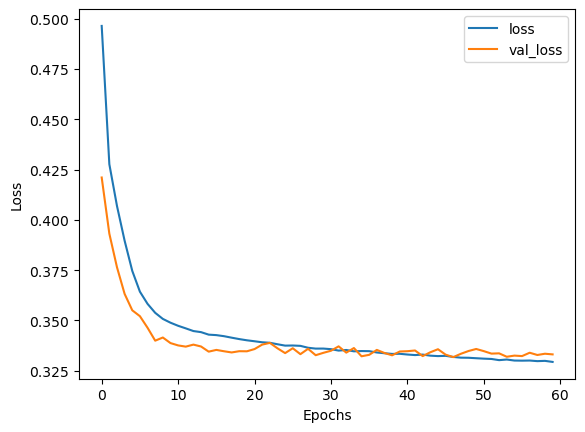

In [218]:
plt.plot(hist_1.history['loss'], label=['loss'])
plt.plot(hist_1.history['val_loss'], label=['val_loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [219]:
print('The accuracy of the training data is 0.8803 and the accuracy of the testing data is: ',np.round((model_1.evaluate(x_test, y_test)),4))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.8803 - loss: 0.3343


array([0.3503, 0.873 ])

This simple model is the baseline accuracy improvement. It shows that validation loss improvements stopped after the 13th epoch while Accuracy loss continued to improve after the 60th epoch. The test accuracy of this model is 0.873.

#### Model 1 with undersampled data:

In [322]:
hist_1u=model_1.fit(x_under, y_under, validation_data=(x_val, y_val),batch_size=32, epochs=60)

Epoch 1/60
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4743 - loss: 0.7336 - val_accuracy: 0.5990 - val_loss: 0.6731
Epoch 2/60
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6737 - loss: 0.6254 - val_accuracy: 0.7340 - val_loss: 0.5837
Epoch 3/60
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7246 - loss: 0.5796 - val_accuracy: 0.7450 - val_loss: 0.5517
Epoch 4/60
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7195 - loss: 0.5686 - val_accuracy: 0.7450 - val_loss: 0.5515
Epoch 5/60
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7393 - loss: 0.5486 - val_accuracy: 0.7530 - val_loss: 0.5327
Epoch 6/60
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7307 - loss: 0.5360 - val_accuracy: 0.7510 - val_loss: 0.5290
Epoch 7/60
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7310 - loss: 0.5371 - val_accuracy: 0.7640 - val_loss: 0.5057
Epoch 8/60
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7412 - loss: 0.5244 - val_accuracy: 0.

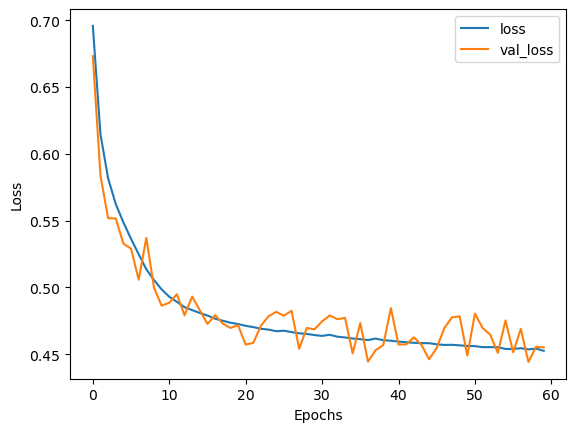

In [326]:
plt.plot(hist_1u.history['loss'], label=['loss'])
plt.plot(hist_1u.history['val_loss'], label=['val_loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [328]:
print('The accuracy of the training data is 0.7890 and the accuracy of the testing data is: ',np.round((model_1.evaluate(x_test, y_test)),4))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 0.7890 - loss: 0.4545
The accuracy of the training data is 0.7890 and the accuracy of the testing data is:  [0.4587 0.792 ]


Model 1 performs better with stratify sample than undersampled data.

## Optimizing Model accuracy:
Using GridSearchCV and KerasClassifier to find the an optimal number of hidden layers for the model and kernel_initializer with 3-fold cross-validation. Comparing between he_normal and he_uniform which are kernel initializers that are optimal for activation function 'relu'. The first iteration of this grid tested for 2 optimizers, adam and RSMprop with adam being the better choice and was changed in favor learning_rate comparisons.

In [23]:
def build_model(n_hidden=1, n_neurons=32, learning_rate=0.001, kernel_initializer='he_normal'):
    model=Sequential()
    model.add(Input(shape=(n,)))
    for layer in range(n_hidden):
        model.add(Dense(n_neurons, activation='relu', kernel_initializer=kernel_initializer))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=learning_rate),loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [76]:
from scikeras.wrappers import KerasClassifier
clf=KerasClassifier(build_model)

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'model__n_hidden':[1,2,3],
    'model__n_neurons':[32,64],
    'model__learning_rate':[0.0001,0.001],
    'model__kernel_initializer':['he_normal','he_uniform']
}

In [236]:
grid_search=GridSearchCV(clf,param_grid,cv=3)
grid_search.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=20, epochs=20, verbose=False)

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step
84/84 ━━━━━━━━━━

GridSearchCV(cv=3,
             estimator=KerasClassifier(model=<function build_model at 0x00000248EC046840>),
             param_grid={'model__kernel_initializer': ['he_normal',
                                                       'he_uniform'],
                         'model__learning_rate': [0.0001, 0.001],
                         'model__n_hidden': [1, 2, 3],
                         'model__n_neurons': [32, 64]})

In [237]:
grid_model1=grid_search.best_estimator_
grid_search.best_params_

{'model__kernel_initializer': 'he_uniform',
 'model__learning_rate': 0.001,
 'model__n_hidden': 2,
 'model__n_neurons': 32}

In [240]:
print('The testing accuracy the model with the optimal number of hidden layers is: ',np.round(grid_model1.score(x_test, y_test),4))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step
The testing accuracy the model with the optimal number of hidden layers is:  0.875


<p>This model is a marginal improvement over the base model.<br>
Having found the optimal number of hidden layers, proceed to optimize other hyperparameters.</p>

## Hyperparameter tuning of optimal 2 hidden layer FNN model:
Utilizing hyperparameters acquired from the previous GridSearchCV, create a model with 2 hidden layers, activation relu, kernel_initializer he_uniform, loss binary_crossentropy and accuracy metrics. The purpose of this GridSearch to further explore additional hypterparameter tuning of neurons, epochs, learning_rate and batch_size. Employing a 5-fold cross-validation. Turning off verbose to save ram during compiling.

In [85]:
def create_model(neurons, learning_rate):
    model_2=Sequential()
    model_2.add(Input(shape=(n,)))
    model_2.add(Dense(neurons, activation='relu', kernel_initializer='he_uniform')),
    model_2.add(Dense(neurons, activation='relu', kernel_initializer='he_uniform')),
    model_2.add(Dense(1, activation='sigmoid'))

    model_2.compile(optimizer=Adam(learning_rate),loss='binary_crossentropy', metrics=['accuracy'])
    return model_2 

In [86]:
from sklearn.model_selection import GridSearchCV 
params={
    'model__neurons':[32,64],
    'batch_size':[32,64,128],
    'epochs':[10,15,20],
    'model__learning_rate':[0.001,0.01]
}

In [87]:
clf_2= KerasClassifier(model=create_model, verbose=0)

In [88]:
grid_model2=GridSearchCV(estimator=clf_2, param_grid=params, n_jobs=1, cv=5)
grid_result=grid_model2.fit(x_train, y_train, validation_data=(x_val, y_val))


In [126]:
print(grid_result.best_params_)
result=grid_result.best_estimator_
print('The testing accuracy the second GridSearchCV model is:', np.round(result.score(x_test, y_test),4))

{'batch_size': 64, 'epochs': 10, 'model__learning_rate': 0.01, 'model__neurons': 32}
The testing accuracy the second GridSearchCV model is: 0.869


## Final Model:

<p>The best testing score evaluation comes from the first GridSearchCV Model.<br>Build a model using the parameters from the first GridSearch with the exception of the inclusion of LeakyRuLU activation in order to put a neagtive value instead of '0' from relu and plot an loss and accuracy plots.</p>


In [350]:
model_3=Sequential()
model_3.add(Input(shape=(n,)))
model_3.add(Dense(32)),
model_3.add(LeakyReLU(negative_slope=0.15)),
model_3.add(Dense(32)),
model_3.add(LeakyReLU(negative_slope=0.15)),          
model_3.add(Dense(1, activation='sigmoid'))

model_3.compile(optimizer=Adam(0.001),loss='binary_crossentropy', metrics=['accuracy'])

In [351]:
hist_3=model_3.fit(x_train, y_train, validation_data=(x_val, y_val),batch_size=20, epochs=20)

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7427 - loss: 0.5228 - val_accuracy: 0.8410 - val_loss: 0.3731
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8412 - loss: 0.3922 - val_accuracy: 0.8610 - val_loss: 0.3398
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.8541 - loss: 0.3570 - val_accuracy: 0.8660 - val_loss: 0.3348
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.8554 - loss: 0.3452 - val_accuracy: 0.8630 - val_loss: 0.3341
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.8595 - loss: 0.3490 - val_accuracy: 0.8480 - val_loss: 0.3381
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 929us/step - accuracy: 0.8562 - loss: 0.3332 - val_accuracy: 0.8600 - val_loss: 0.3352
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.8587 - loss: 0.3402 - val_accuracy: 0.8640 - val_loss: 0.3291
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.8589 - loss: 0.3427 - val_

#### Loss and validation loss graph:

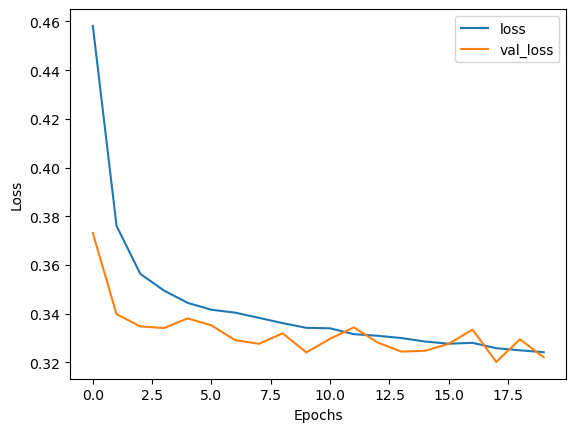

In [352]:
plt.plot(hist_3.history['loss'], label=['loss'])
plt.plot(hist_3.history['val_loss'], label=['val_loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Training and validation accuracy graph:

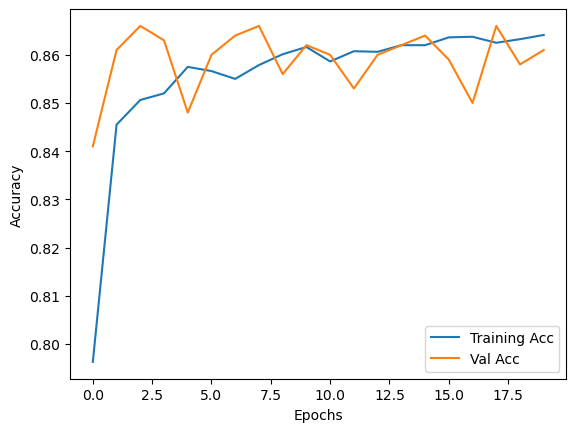

In [353]:
plt.plot(hist_3.history['accuracy'], label=['Training Acc'])
plt.plot(hist_3.history['val_accuracy'], label=['Val Acc'])

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Evaluation:

In [355]:
print('The accuracy of the training data is 0.8845 and the accuracy of the testing data is: ',np.round((model_3.evaluate(x_test, y_test)),4))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.8851 - loss: 0.3251
The accuracy of the training data is 0.8845 and the accuracy of the testing data is:  [0.3441 0.875 ]


#### Confusion Matrix:

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step
[[797   0]
 [203   0]]


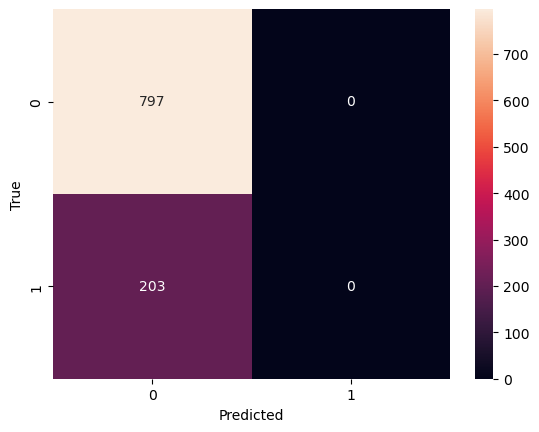

In [401]:
from sklearn.metrics import confusion_matrix
y_pred=model_3.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
print(confusion_matrix(y_test, y_pred))

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Interpretation:
<p>The confusion matrix shows that there are 203 missclassifications, with no '1', this means that the model is not good a predicting a churn rate and sees churn as noise despite the model having a higher accuracy on testing and validation. This can be attributed to the imbalanced data which is why fitting model 3 with the undersampled data to compare has to be done.</p>

#### Fit, graph and confusion matrix of model 3 with undersampled data:

In [395]:
hist_3u=model_3.fit(x_under, y_under, validation_data=(x_val, y_val),batch_size=20, epochs=20)

Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8662 - loss: 0.3148 - val_accuracy: 0.7550 - val_loss: 0.5667
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8495 - loss: 0.3216 - val_accuracy: 0.7880 - val_loss: 0.4915
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8570 - loss: 0.3265 - val_accuracy: 0.7670 - val_loss: 0.5399
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8525 - loss: 0.3252 - val_accuracy: 0.7550 - val_loss: 0.5674
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8610 - loss: 0.3140 - val_accuracy: 0.7760 - val_loss: 0.5462
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8563 - loss: 0.3182 - val_accuracy: 0.7530 - val_loss: 0.5689
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8505 - loss: 0.3243 - val_accuracy: 0.7910 - val_loss: 0.4948
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8580 - loss: 0.3059 - val_accuracy: 0.

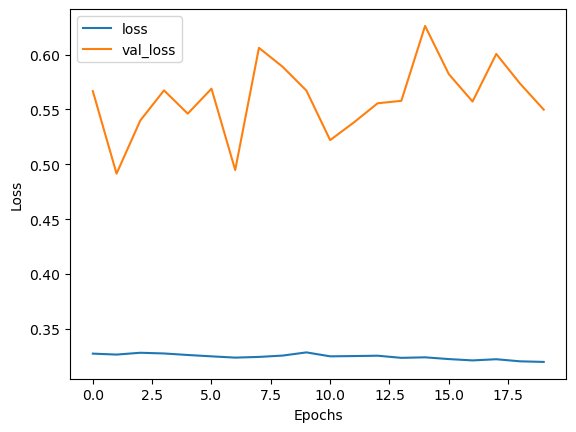

In [396]:
plt.plot(hist_3u.history['loss'], label=['loss'])
plt.plot(hist_3u.history['val_loss'], label=['val_loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(hist_3u.history['accuracy'], label=['Training Acc'])
plt.plot(hist_3u.history['val_accuracy'], label=['Val Acc'])

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [399]:
print('The accuracy of the undersampled data is 0.7550 and the accuracy of the testing data is: ',np.round((model_3.evaluate(x_test, y_test)),4))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.7550 - loss: 0.5530
The accuracy of the undersampled data is 0.7550 and the accuracy of the testing data is:  [0.5351 0.764 ]


102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step


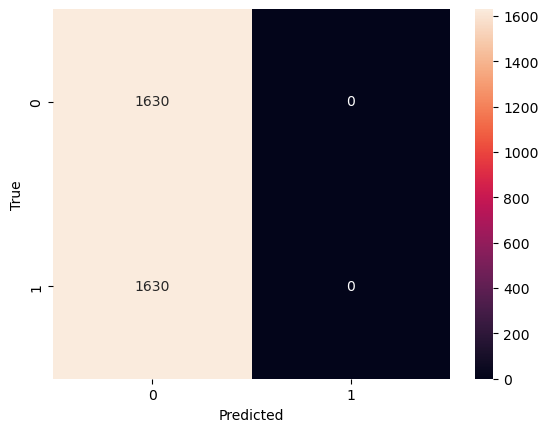

In [400]:
from sklearn.metrics import confusion_matrix
y_pred=model_3.predict(x_under)
y_pred=np.argmax(y_pred, axis=1)
cm2=confusion_matrix(y_under, y_pred)

sns.heatmap(cm2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Even training with undersampled data, the model does not classify '1'.

### Conclusions:
<ul><il>Which features contributed most to model's performance?</il><ul>Increasing training data split to .8 increased accuracy among all models by 0.03, reducing number of epochs and LeakyReLU activations provided consistency to model and validation accuracy.</ul></ul>
<ul><il>Are there limitations to the model?</il><ul>As confusion matrix shows, the model is not good at predicting client churn and most likely treats '1' as noise. FNN might not be the best prediction model for this dataset. Undersampling did not imporved model accuracy or predictive capabilities.</ul></ul>

